# Sprint19課題 データセット作成

## この課題の目的

- データセットを作成し学習する
- データ拡張を行う

## 自作データセットの学習

自作のデータセットに対して分類および物体検出を行っていきます。具体的なタスクは講師からの指示に従ってください。

## 【問題1】自作データセットでの分類の学習

自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。

In [1]:
import numpy as np
import keras
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras import backend as K
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from urllib.request import urlopen
import sys
from xml.etree import ElementTree
from xml.etree.ElementTree import Element, SubElement
from lxml import etree
import codecs
from glob import glob

Using TensorFlow backend.


In [2]:
def data_making(path):
    '''
    学習用データを作成する関数
    '''
    
    #リスト
    X = []
    y = []

    #揃えるサイズ
    img_h = 224
    img_w = 224

    for animal in os.listdir(path):

        #画像のパス
        animal_path = path + animal

        #犬
        if 'dog' in animal_path and 'jpg' in animal_path:        
            if animal != '.DS_Store':
                #画像を開く
                dog_img = Image.open(animal_path)

                #numpy配列に変換
                dog_img = np.asarray(dog_img)
                
                #4→3チャンネルに変換
                if dog_img.shape[2] == 4:
                    dog_img = cv2.cvtColor(dog_img, cv2.COLOR_RGBA2RGB)

                #resize
                dog_img = cv2.resize(dog_img, (img_h, img_w))

                #floatに
                dog_img = dog_img.astype(float)

                #正規化して追加
                X.append(dog_img / 255)
                label = 0
                y.append(label)

        #猫も同様
        if 'cat' in animal_path and 'jpg' in animal_path:     
            if animal != '.DS_Store':
                #画像を開く
                cat_img = Image.open(animal_path)
                #numpy配列に変換
                cat_img = np.asarray(cat_img)
                
                #4→3チャンネルに変換
                if cat_img.shape[2] == 4:
                    cat_img = cv2.cvtColor(cat_img, cv2.COLOR_RGBA2RGB)
                    
                #resize
                cat_img = cv2.resize(cat_img, (img_h, img_w))

                #floatに
                cat_img = cat_img.astype(float)

                #正規化して追加
                X.append(cat_img / 255)
                label = 1
                y.append(label)
      
    #numpyarrayに
    X = np.array(X)
    y = np.array(y)
    
    return X, y

In [3]:
#学習用データの作成
X, y = data_making('./animal/')

In [4]:
#検証用データの作成
X_test, y_test = data_making('./test/')

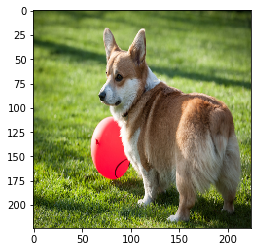

In [5]:
plt.imshow(X[0]);

In [6]:
#分割
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [7]:
def model_making():
    '''
    モデル
    '''
    model = Sequential()
    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))   
    
    return model

In [8]:
model = model_making()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 32)      4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 93312)             0         
_________________________________________________________________
dens

In [9]:
#コンパイル
model.compile(loss='binary_crossentropy', 
             optimizer=RMSprop(lr=1e-4), 
             metrics=['accuracy'])

In [10]:
#学習
model.fit(X_train, y_train, batch_size=1, epochs=15, validation_data=(X_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 16 samples, validate on 4 samples
Epoch 1/15
16/16 [==============================] - 11s 663ms/step - loss: 1.1860 - acc: 0.5000 - val_loss: 1.3324 - val_acc: 0.2500
Epoch 2/15
16/16 [==============================] - 9s 592ms/step - loss: 0.6170 - acc: 0.6875 - val_loss: 0.7785 - val_acc: 0.7500
Epoch 3/15
16/16 [==============================] - 8s 509ms/step - loss: 0.4537 - acc: 0.8125 - val_loss: 0.5873 - val_acc: 0.7500
Epoch 4/15
16/16 [==============================] - 8s 528ms/step - loss: 0.3641 - acc: 0.9375 - val_loss: 0.4640 - val_acc: 0.5000
Epoch 5/15
16/16 [==============================] - 8s 517ms/step - loss: 0.1252 - acc: 1.0000 - val_loss: 0.7070 - val_acc: 0.7500
Epoch 6/15
16/16 [==============================] - 8s 503ms/step - loss: 0.1954 - acc: 0.8750 - val_loss: 0.5583 - val_acc: 0.7500
Epoch 7/15
16/16 [==============================] - 8s 501ms/step - loss: 0.0367 - acc: 1.0000 - val_loss: 0.6717 - 

In [11]:
#推定
y_pred_proba = model.predict(X_test)[:, 0]
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)

#評価
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred_proba [0.35100824 0.9990702  0.99999976 0.9999883  0.16935918 0.9896002 ]
y_pred [0 1 1 1 0 1]
Test loss: 2.8594696521759033
Test accuracy: 0.5


In [12]:
def uncorrect_image(X_test, y_test, y_pred):
    '''
    間違ったいた画像を出力する関数
    '''
    label = {0: '犬', 1: '猫'}
    for i in range(y_test.shape[0]):
        if y_test[i] != y_pred[i]:
            print('pred : {}, true : {}'.format(label[y_pred[i]], label[y_test[i]]))
            plt.imshow(X_test[i])
            plt.show()

pred : 犬, true : 猫


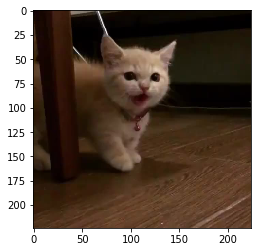

pred : 猫, true : 犬


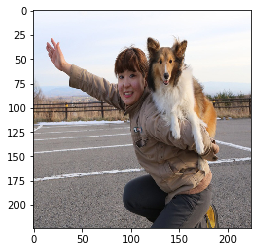

pred : 猫, true : 犬


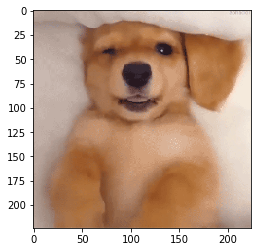

In [13]:
#間違ったいた画像を出力
uncorrect_image(X_test, y_test, y_pred)

## 【問題2】分類データセットに対するデータ拡張

データ拡張（Data Augmentation）を行ってください。

データ拡張のためのライブラリ

データ拡張にはalbumentationsなどがあります。

[albu/albumentations: fast image augmentation library and easy to use wrapper around other libraries](https://github.com/albu/albumentations)

また、Kerasを使う場合はImageDataGeneratorも便利です。


データ拡張の効果の調査

データ拡張には様々な方法があります。今回のタスクにおいて各手法がどう効果があるかを実験・考察してください。

In [2]:
from albumentations import (
    HorizontalFlip, Rotate,Transpose, VerticalFlip, ShiftScaleRotate, Blur,CenterCrop, Compose)

In [25]:
def augment_and_show(aug, image, y, path):
    '''
    データ拡張した画像を出力、保存する関数
    Parameters
    --------------
    aug : 加工方法
    image : 画像の配列
    y : 画像のラベル
    path : 保存するパス
    '''
    for i, img in enumerate(image):
        img = aug(image=img)['image']
        
        #犬
        if y[i] == 0:
            #保存
            pil_img_f = Image.fromarray((img * 255).astype(np.uint8))
            pil_img_f.save(path + 'dog' + str(10 + i) + '.jpg')
    
        #猫
        if y[i] == 1:
            #保存
            pil_img_f = Image.fromarray((img * 255).astype(np.uint8))
            pil_img_f.save(path+ 'cat' + str(10 + i) + '.jpg')

        plot_num = i+1
        plt.subplot(4, 5, plot_num)
        plt.tick_params(labelbottom=False) # x軸の削除
        plt.tick_params(labelleft=False) # y軸の削除
        plt.imshow(img);

### ぼかす

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


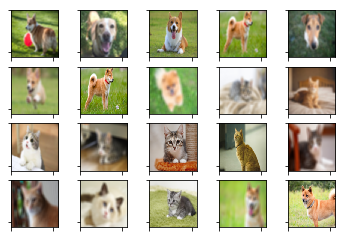

In [16]:
aug = Blur(p=1, blur_limit=15)
augment_and_show(aug, X, y, './animal_2/')

In [17]:
#学習用データの作成
X_2, y_2 = data_making('./animal_2/')

#分割
X_train, X_val, y_train, y_val = train_test_split(X_2, y_2, test_size=0.2)

#モデルの作成
K.clear_session()
model = model_making()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 32)      4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 93312)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               47776256  
__________

In [18]:
#コンパイル
model.compile(loss='binary_crossentropy', 
             optimizer=RMSprop(lr=1e-4), 
             metrics=['accuracy'])

In [19]:
#学習
model.fit(X_train, y_train, batch_size=1, epochs=15, validation_data=(X_val, y_val))

Train on 32 samples, validate on 8 samples
Epoch 1/15
32/32 [==============================] - 18s 563ms/step - loss: 1.0025 - acc: 0.5938 - val_loss: 0.5373 - val_acc: 0.6250
Epoch 2/15
32/32 [==============================] - 18s 571ms/step - loss: 0.5618 - acc: 0.6875 - val_loss: 0.2253 - val_acc: 1.0000
Epoch 3/15
32/32 [==============================] - 18s 567ms/step - loss: 0.2148 - acc: 0.9062 - val_loss: 0.0370 - val_acc: 1.0000
Epoch 4/15
32/32 [==============================] - 16s 498ms/step - loss: 0.1116 - acc: 0.9375 - val_loss: 0.0090 - val_acc: 1.0000
Epoch 5/15
32/32 [==============================] - 17s 531ms/step - loss: 0.0968 - acc: 0.9688 - val_loss: 0.0042 - val_acc: 1.0000
Epoch 6/15
32/32 [==============================] - 19s 595ms/step - loss: 0.0085 - acc: 1.0000 - val_loss: 0.6074 - val_acc: 0.7500
Epoch 7/15
32/32 [==============================] - 17s 530ms/step - loss: 0.0089 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000
Epoch 8/15
32/32 [========

In [20]:
#推定
y_pred_proba = model.predict(X_test)[:, 0]
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)

#評価
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred_proba [0.63513637 0.9995915  1.         1.         0.0492981  0.9999988 ]
y_pred [1 1 1 1 0 1]
Test loss: 5.014510631561279
Test accuracy: 0.6666666865348816


In [21]:
#精度
accuracy_score(y_test, y_pred)

0.6666666666666666

pred : 猫, true : 犬


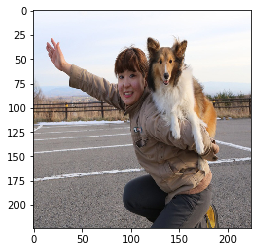

pred : 猫, true : 犬


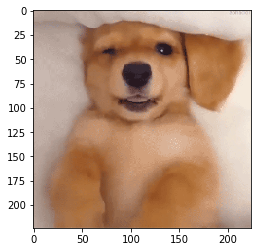

In [22]:
#間違ったいた画像を出力
uncorrect_image(X_test, y_test, y_pred)

### 水平に反転

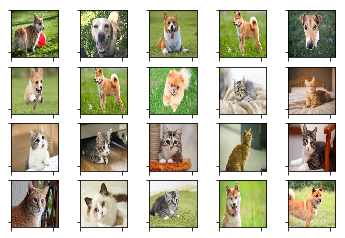

In [23]:
aug = HorizontalFlip(p=1)
augment_and_show(aug, X, y, './animal_3/')

In [24]:
#学習用データの作成
X_3, y_3 = data_making('./animal_3/')

#分割
X_train, X_val, y_trainl, y_val = train_test_split(X_3, y_3, test_size=0.2)

#モデルの作成
K.clear_session()
model = model_making()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 32)      4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 93312)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               47776256  
__________

In [25]:
#コンパイル
model.compile(loss='binary_crossentropy', 
             optimizer=RMSprop(lr=1e-4), 
             metrics=['accuracy'])

In [26]:
#学習
model.fit(X_train, y_train, batch_size=1, epochs=15, validation_data=(X_val, y_val))

Train on 32 samples, validate on 8 samples
Epoch 1/15
32/32 [==============================] - 21s 652ms/step - loss: 1.0572 - acc: 0.3438 - val_loss: 0.6923 - val_acc: 0.6250
Epoch 2/15
32/32 [==============================] - 16s 487ms/step - loss: 0.7638 - acc: 0.3750 - val_loss: 0.6768 - val_acc: 0.6250
Epoch 3/15
32/32 [==============================] - 16s 499ms/step - loss: 0.7254 - acc: 0.5312 - val_loss: 0.7517 - val_acc: 0.3750
Epoch 4/15
32/32 [==============================] - 16s 493ms/step - loss: 0.6655 - acc: 0.6250 - val_loss: 0.7261 - val_acc: 0.5000
Epoch 5/15
32/32 [==============================] - 16s 491ms/step - loss: 0.5894 - acc: 0.7812 - val_loss: 0.7596 - val_acc: 0.5000
Epoch 6/15
32/32 [==============================] - 16s 506ms/step - loss: 0.4540 - acc: 0.8438 - val_loss: 1.0256 - val_acc: 0.3750
Epoch 7/15
32/32 [==============================] - 18s 551ms/step - loss: 0.2888 - acc: 0.8750 - val_loss: 0.9950 - val_acc: 0.0000e+00
Epoch 8/15
32/32 [====

In [27]:
#推定
y_pred_proba = model.predict(X_test)[:, 0]
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)

#評価
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred_proba [8.1877476e-01 3.9702457e-01 5.9200084e-04 2.6719239e-02 6.1626965e-01
 1.8967339e-01]
y_pred [1 0 0 0 1 0]
Test loss: 1.6251535415649414
Test accuracy: 0.5


pred : 犬, true : 猫


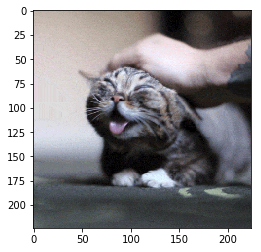

pred : 犬, true : 猫


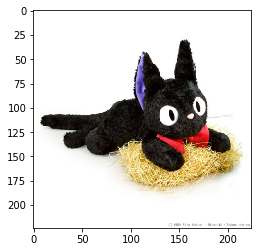

pred : 猫, true : 犬


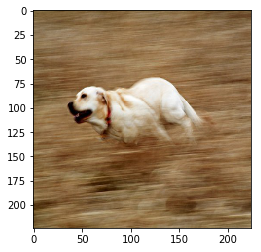

In [28]:
#間違ったいた画像を出力
uncorrect_image(X_test, y_test, y_pred)

### 垂直に反転

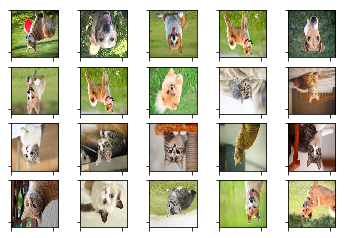

In [29]:
aug = VerticalFlip(p=1)
augment_and_show(aug, X, y, './animal_4/')

In [30]:
#学習用データの作成
X_4, y_4 = data_making('./animal_4/')

#分割
X_train, X_val, y_train, y_val = train_test_split(X_4, y_4, test_size=0.2)

#モデルの作成
K.clear_session()
model = model_making()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 32)      4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 93312)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               47776256  
__________

In [31]:
#コンパイル
model.compile(loss='binary_crossentropy', 
             optimizer=RMSprop(lr=1e-4), 
             metrics=['accuracy'])

In [32]:
#学習
model.fit(X_train, y_train, batch_size=1, epochs=15, validation_data=(X_val, y_val))

Train on 32 samples, validate on 8 samples
Epoch 1/15
32/32 [==============================] - 22s 683ms/step - loss: 1.0110 - acc: 0.4062 - val_loss: 0.6525 - val_acc: 0.5000
Epoch 2/15
32/32 [==============================] - 18s 564ms/step - loss: 0.6229 - acc: 0.5938 - val_loss: 0.4127 - val_acc: 0.8750
Epoch 3/15
32/32 [==============================] - 19s 590ms/step - loss: 0.4098 - acc: 0.8125 - val_loss: 0.3269 - val_acc: 0.8750
Epoch 4/15
32/32 [==============================] - 20s 627ms/step - loss: 0.1877 - acc: 0.9375 - val_loss: 0.2278 - val_acc: 0.8750
Epoch 5/15
32/32 [==============================] - 18s 562ms/step - loss: 0.1764 - acc: 0.9688 - val_loss: 0.3421 - val_acc: 0.8750
Epoch 6/15
32/32 [==============================] - 16s 495ms/step - loss: 0.1031 - acc: 0.9375 - val_loss: 0.1269 - val_acc: 0.8750
Epoch 7/15
32/32 [==============================] - 17s 540ms/step - loss: 0.0345 - acc: 1.0000 - val_loss: 0.3046 - val_acc: 0.8750
Epoch 8/15
32/32 [========

In [33]:
#推定
y_pred_proba = model.predict(X_test)[:, 0]
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)

#評価
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred_proba [0.98170245 0.9999286  1.         0.99999833 0.9477431  0.9999994 ]
y_pred [1 1 1 1 1 1]
Test loss: 5.101066589355469
Test accuracy: 0.5


pred : 猫, true : 犬


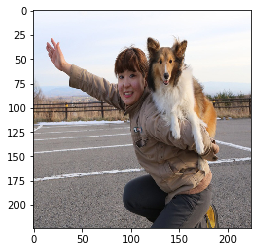

pred : 猫, true : 犬


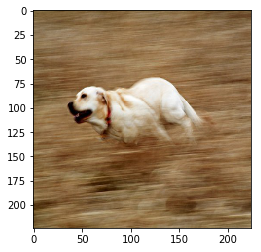

pred : 猫, true : 犬


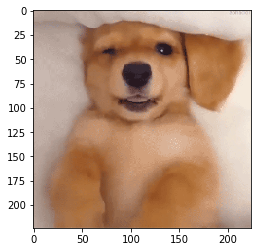

In [34]:
#間違ったいた画像を出力
uncorrect_image(X_test, y_test, y_pred)

###  中央の部分をトリミング

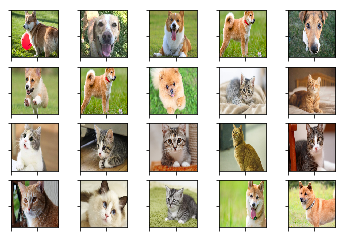

In [35]:
aug = CenterCrop(height=180, width=180)
augment_and_show(aug, X, y, './animal_5/')

In [36]:
#学習用データの作成
X_5, y_5 = data_making('./animal_5/')

#分割
X_train, X_val, y_train, y_val = train_test_split(X_5, y_5, test_size=0.2)

#モデルの作成
K.clear_session()
model = model_making()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 32)      4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 93312)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               47776256  
__________

In [37]:
#コンパイル
model.compile(loss='binary_crossentropy', 
             optimizer=RMSprop(lr=1e-4), 
             metrics=['accuracy'])

In [38]:
#学習
model.fit(X_train, y_train, batch_size=1, epochs=15, validation_data=(X_val, y_val))

Train on 32 samples, validate on 8 samples
Epoch 1/15
32/32 [==============================] - 22s 691ms/step - loss: 0.7864 - acc: 0.5312 - val_loss: 0.8957 - val_acc: 0.2500
Epoch 2/15
32/32 [==============================] - 18s 570ms/step - loss: 0.4341 - acc: 0.7500 - val_loss: 0.3287 - val_acc: 0.8750
Epoch 3/15
32/32 [==============================] - 20s 613ms/step - loss: 0.1988 - acc: 0.9375 - val_loss: 0.3009 - val_acc: 0.8750
Epoch 4/15
32/32 [==============================] - 18s 572ms/step - loss: 0.0648 - acc: 1.0000 - val_loss: 0.5311 - val_acc: 0.6250
Epoch 5/15
32/32 [==============================] - 17s 543ms/step - loss: 0.0128 - acc: 1.0000 - val_loss: 1.1779 - val_acc: 0.6250
Epoch 6/15
32/32 [==============================] - 21s 645ms/step - loss: 0.0263 - acc: 1.0000 - val_loss: 0.4809 - val_acc: 0.8750
Epoch 7/15
32/32 [==============================] - 18s 567ms/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.6932 - val_acc: 0.7500
Epoch 8/15
32/32 [========

In [39]:
#推定
y_pred_proba = model.predict(X_test)[:, 0]
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)

#評価
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred_proba [0.9067093  0.99999964 1.         1.         0.7930461  0.99999726]
y_pred [1 1 1 1 1 1]
Test loss: 5.070411682128906
Test accuracy: 0.5


pred : 猫, true : 犬


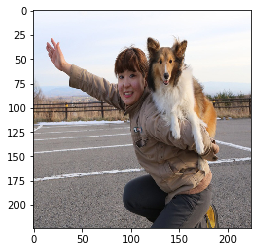

pred : 猫, true : 犬


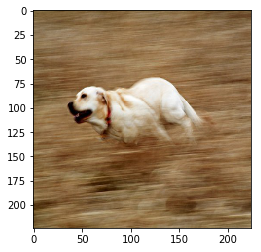

pred : 猫, true : 犬


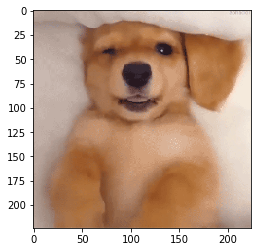

In [40]:
#間違ったいた画像を出力
uncorrect_image(X_test, y_test, y_pred)

### 角度を変える

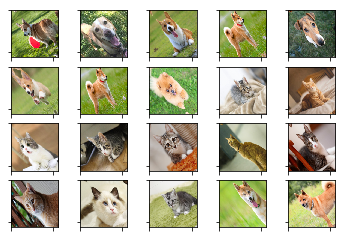

In [41]:
aug = Rotate(limit=(30, 45), p=1)
augment_and_show(aug, X, y, './animal_6/')

In [42]:
#学習用データの作成
X_6, y_6 = data_making('./animal_6/')

#分割
X_train, X_val, y_train, y_val = train_test_split(X_6, y_6, test_size=0.2)

#モデルの作成
K.clear_session()
model = model_making()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 32)      4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 93312)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               47776256  
__________

In [43]:
#コンパイル
model.compile(loss='binary_crossentropy', 
             optimizer=RMSprop(lr=1e-4), 
             metrics=['accuracy'])

In [44]:
#学習
model.fit(X_train, y_train, batch_size=1, epochs=15, validation_data=(X_val, y_val))

Train on 32 samples, validate on 8 samples
Epoch 1/15
32/32 [==============================] - 21s 659ms/step - loss: 1.3073 - acc: 0.4062 - val_loss: 0.6079 - val_acc: 1.0000
Epoch 2/15
32/32 [==============================] - 18s 554ms/step - loss: 0.6424 - acc: 0.7500 - val_loss: 0.5834 - val_acc: 0.5000
Epoch 3/15
32/32 [==============================] - 16s 503ms/step - loss: 0.5846 - acc: 0.6562 - val_loss: 0.6086 - val_acc: 0.5000
Epoch 4/15
32/32 [==============================] - 16s 502ms/step - loss: 0.5125 - acc: 0.7500 - val_loss: 0.6789 - val_acc: 0.6250
Epoch 5/15
32/32 [==============================] - 16s 500ms/step - loss: 0.3360 - acc: 0.8750 - val_loss: 0.4468 - val_acc: 0.6250
Epoch 6/15
32/32 [==============================] - 16s 503ms/step - loss: 0.1904 - acc: 0.9062 - val_loss: 0.1908 - val_acc: 1.0000
Epoch 7/15
32/32 [==============================] - 16s 505ms/step - loss: 0.1996 - acc: 0.9062 - val_loss: 0.3289 - val_acc: 0.8750
Epoch 8/15
32/32 [========

In [45]:
#推定
y_pred_proba = model.predict(X_test)[:, 0]
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)

#評価
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred_proba [0.02678701 0.9988965  1.         0.99998915 0.00558067 0.9990465 ]
y_pred [0 1 1 1 0 1]
Test loss: 3.6689064502716064
Test accuracy: 0.5


pred : 犬, true : 猫


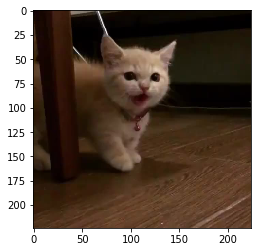

pred : 猫, true : 犬


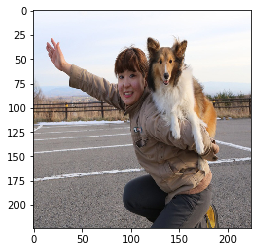

pred : 猫, true : 犬


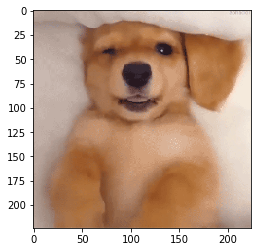

In [46]:
#間違ったいた画像を出力
uncorrect_image(X_test, y_test, y_pred)

テスト画像を推定すると、問題1(拡張なし)ではaccuracyが0.5であった。

問題2では、学習用画像に対して水平方向に反転させたり、角度を変えたり、ぼかしたりするなど行いデータ拡張を行なってテスト画像を推定すると、画像をぼかした場合のみaccuracyが0.67に上がり、その他はaccuracyに変化は見られなかった。

## 【問題3】物体検出データセットの用意

次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。

アノテーションのためのツール

アノテーションツールにはLabelImgなどがあります。

[tzutalin/labelImg: LabelImg is a graphical image annotation tool and label object bounding boxes in images](https://github.com/tzutalin/labelImg)

In [55]:
%run labelImg/labelImg.py

Image:/Users/yuhisoejima/python/diveintocode-ml/diveintocode-term2/sprint19/bbox_img/cat0.jpg -> Annotation:/Users/yuhisoejima/python/diveintocode-ml/diveintocode-term2/sprint19/bbox_xml/cat0.xml
Image:/Users/yuhisoejima/python/diveintocode-ml/diveintocode-term2/sprint19/bbox_img/cat1.jpg -> Annotation:/Users/yuhisoejima/python/diveintocode-ml/diveintocode-term2/sprint19/bbox_xml/cat1.xml
Image:/Users/yuhisoejima/python/diveintocode-ml/diveintocode-term2/sprint19/bbox_img/cat2.jpg -> Annotation:/Users/yuhisoejima/python/diveintocode-ml/diveintocode-term2/sprint19/bbox_xml/cat2.xml
Image:/Users/yuhisoejima/python/diveintocode-ml/diveintocode-term2/sprint19/bbox_img/cat3.jpg -> Annotation:/Users/yuhisoejima/python/diveintocode-ml/diveintocode-term2/sprint19/bbox_xml/cat3.xml
Image:/Users/yuhisoejima/python/diveintocode-ml/diveintocode-term2/sprint19/bbox_img/cat4.jpg -> Annotation:/Users/yuhisoejima/python/diveintocode-ml/diveintocode-term2/sprint19/bbox_xml/cat4.xml
Image:/Users/yuhisoe

<Figure size 432x288 with 0 Axes>

pascal voc形式でアノテーションを行い、各画像に対してxmlファイルが出力された。

[出力されたファイル](https://github.com/yuuhi-s/diveintocode-ml/tree/master/diveintocode-term2/sprint19/bbox_xml)

## 【問題4】物体検出データセットに対するデータ拡張

データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。

物体検出の学習を行なうかどうかは任意とします。

In [3]:
XML_EXT = '.xml'
ENCODE_METHOD = 'utf-8'

class PascalVocReader:
    '''
    xml形式→yolov3用のtxt形式に変換するクラス
    '''
    def __init__(self, filepath):
        # shapes type:
        # [labbel, [(x1,y1), (x2,y2), (x3,y3), (x4,y4)], color, color, difficult]
        self.shapes = []
        self.filepath = filepath
        self.verified = False
        try:
            self.parseXML()
        except:
            pass

        
    def getShapes(self):
        return self.shapes

    
    def addShape(self, label, bndbox, filename, difficult):
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        points = [xmin,ymin,xmax,ymax]
        self.shapes.append((label, points, filename, difficult))

        
    def parseXML(self):
        assert self.filepath.endswith(XML_EXT), "Unsupport file format"
        parser = etree.XMLParser(encoding=ENCODE_METHOD)
        xmltree = ElementTree.parse(self.filepath, parser=parser).getroot()
        filename = xmltree.find('filename').text
        path = xmltree.find('path').text
        try:
            verified = xmltree.attrib['verified']
            if verified == 'yes':
                self.verified = True
        except KeyError:
            self.verified = False

        for object_iter in xmltree.findall('object'):
            bndbox = object_iter.find("bndbox")
            label = object_iter.find('name').text
            # Add chris

            difficult = False
            if object_iter.find('difficult') is not None:
                difficult = bool(int(object_iter.find('difficult').text))
            self.addShape(label, bndbox, path, difficult)
        return True


classes = dict()
num_classes = 0

try:
    input = raw_input
except NameError:
    pass


parentpath = './' #"Directory path with parent dir before xml_dir or img_dir"
addxmlpath = parentpath + 'bbox_xml' #"Directory path with XML files"
addimgpath = parentpath + 'bbox_img' #"Directory path with IMG files"
outputpath = parentpath + 'traffic_format4yolo' #"output folder for yolo format"
classes_txt = './traffic_classes.txt' #"File containing classes"
ext = '.jpg' #"Image file extension [.jpg or .png]"


if os.path.isfile(classes_txt):
    with open(classes_txt, "r") as f:
        class_list = f.read().strip().split()
        classes = {k : v for (v, k) in enumerate(class_list)}

xmlPaths = glob(addxmlpath + "/*.xml")
#imgPaths = glob(addimgpath + "/*"+ext)

for xmlPath in xmlPaths:
    tVocParseReader = PascalVocReader(xmlPath)
    shapes = tVocParseReader.getShapes()

    with open(outputpath + "/" + os.path.basename(xmlPath)[:-4] + ".txt", "w") as f:
        for shape in shapes:
            class_name = shape[0]
            box = shape[1]
            #filename = os.path.splittext(xmlPath)[0] + ext
            filename = os.path.splitext(addimgpath + "/" + os.path.basename(xmlPath)[:-4])[0] + ext

            if class_name not in classes.keys():
                classes[class_name] = num_classes
                num_classes += 1
            class_idx = classes[class_name]

            f.write("%s %d,%d,%d,%d,%d\n" % (filename, box[0], box[1], box[2], box[3], class_idx))
            print(filename, box[0], box[1], box[2], box[3], class_idx)

with open(parentpath + "classes.txt", "w") as f:
    for key in classes.keys():
        f.write("%s\n" % key)
        print(key)

./bbox_img/dog5.jpg 221 37 684 460 0
./bbox_img/dog4.jpg 101 17 608 594 0
./bbox_img/dog6.jpg 109 25 489 368 0
./bbox_img/dog7.jpg 108 13 687 501 0
./bbox_img/dog3.jpg 191 41 526 393 0
./bbox_img/dog2.jpg 220 6 513 416 0
./bbox_img/dog0.jpg 104 9 699 509 0
./bbox_img/dog1.jpg 165 25 456 384 0
./bbox_img/cat1.jpg 203 134 730 446 1
./bbox_img/cat0.jpg 108 116 506 446 1
./bbox_img/cat2.jpg 110 19 425 398 1
./bbox_img/cat3.jpg 423 77 1235 616 1
./bbox_img/cat7.jpg 210 10 540 458 1
./bbox_img/cat6.jpg 313 66 903 671 1
./bbox_img/cat4.jpg 17 10 680 443 1
./bbox_img/cat5.jpg 102 17 489 333 1
./bbox_img/cat8.jpg 62 22 393 252 1
./bbox_img/cat9.jpg 183 67 486 284 1
./bbox_img/dog9.jpg 387 34 669 392 0
./bbox_img/dog8.jpg 191 71 673 495 0
dog
cat


Kerasのyolov3で学習できる形式に変換した。

[クラス](https://github.com/yuuhi-s/diveintocode-ml/blob/master/diveintocode-term2/sprint19/classes.txt)

[アノテーションファイル](https://github.com/yuuhi-s/diveintocode-ml/tree/master/diveintocode-term2/sprint19/traffic_format4yolo)

In [4]:
def load_image(directory):
    '''
    画像を開く関数
    '''
    image = Image.open(directory)
    return image

In [27]:
# Functions to visualize bounding boxes and class labels on an image. 
# Based on https://github.com/facebookresearch/Detectron/blob/master/detectron/utils/vis.py

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    '''
    bounding boxを可視化する関数
    '''
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    '''
    画像を出力する関数
    '''
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)

In [28]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params={'format': 'coco', 'min_area': min_area, 
                                     'min_visibility': min_visibility, 'label_fields': ['category_id']})

In [29]:
#画像を開く
img = load_image('./bbox_img/cat2.jpg')
img = np.array(img)

In [33]:
#bounding boxの情報
annotations = {'image': img, 'bboxes': [[110, 19, 425-110, 398-19]], 'category_id': [1]}
category_id_to_name = {0: 'dog', 1: 'cat'}

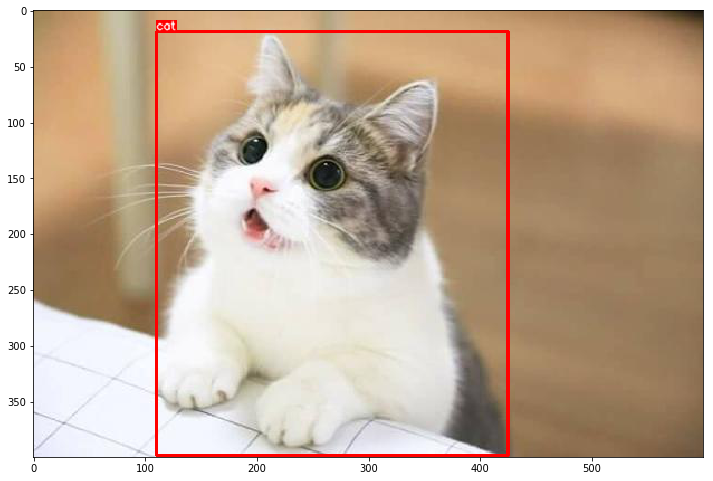

In [34]:
#出力
visualize(annotations, category_id_to_name)

### 垂直に反転

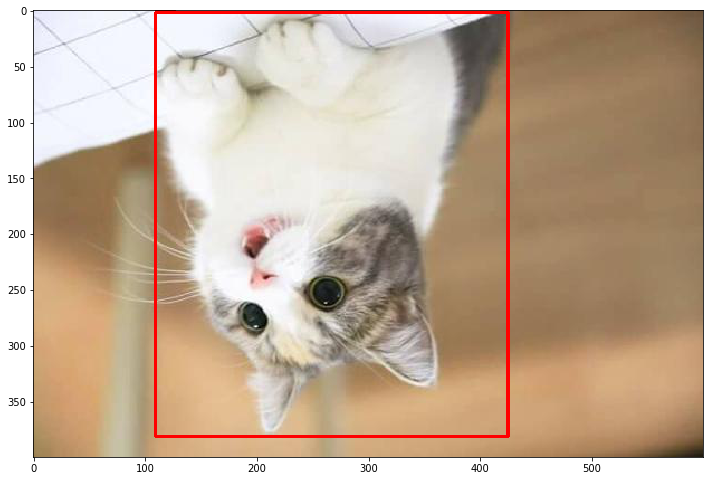

In [35]:
aug = get_aug([VerticalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

### 拡大

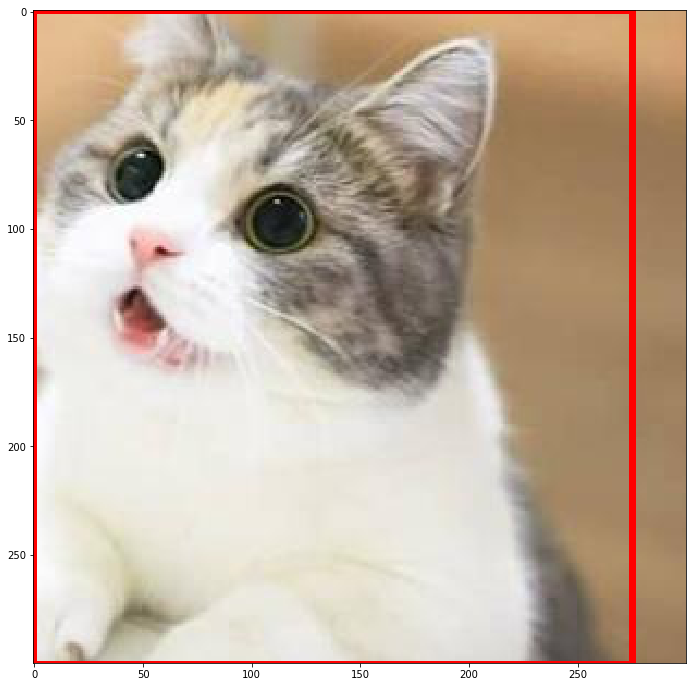

In [36]:
aug = get_aug([CenterCrop(p=1, height=300, width=300)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

### 左右反転

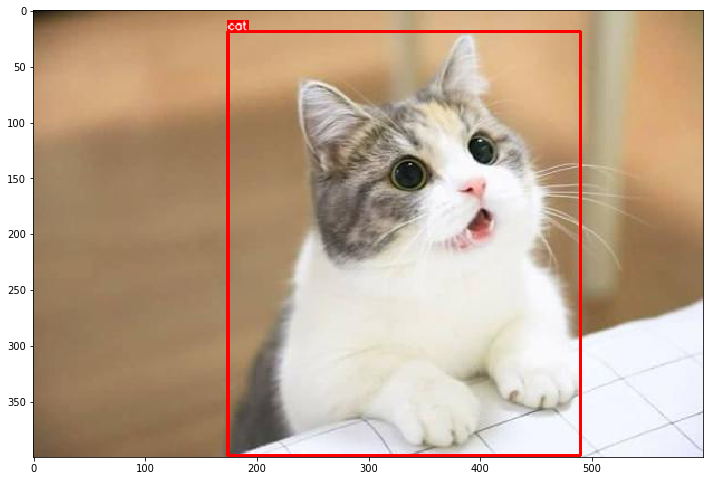

In [37]:
aug = get_aug([HorizontalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

bounding boxの情報も含めて加工されていることが確認できた。